# HDB performance prediction in Singapore

This research takes public housing (HDB), which is widely existed in Singapore, as the research object, and analyzes the prediction and optimization of building performance under different climatic conditions in the future.

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

import os

import lightgbm as lgb

# Data 

Building Data Genome 2.0. BDG2.0 is an open data set consisting of 3,053 meters in 1,636 buildings from a number of different countries.

In [10]:
path_bdg = r'F:\AIMLArchitecture\Lec_05_SKLEARN\Lec_05\BDG2项目数据集\BDG2项目数据集'

os.listdir(path_bdg)

['electricity.csv',
 'electricity_cleaned.csv',
 'metadata.csv',
 'weather.csv',
 '数据集信息介绍.docx',
 '数据集信息介绍.pdf']

In [11]:
# 讀取electricity_cleaned.csv
electricity_cleaned = pd.read_csv(os.path.join(path_bdg, 'electricity_cleaned.csv'), 
                                  parse_dates=True, 
                                  index_col='timestamp')
electricity_cleaned

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,0.6401,...,96.925,704.950,111.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,0.7301,...,97.550,695.700,115.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,0.7201,...,93.825,687.325,111.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 讀取weather.csv
weather = pd.read_csv(os.path.join(path_bdg, 'weather.csv'), 
                      parse_dates=True, 
                      index_col='timestamp')
weather

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,Mouse,8.5,NaN,4.8,NaN,NaN,992.3,210.0,8.2
2017-12-31 20:00:00,Mouse,8.5,NaN,4.5,NaN,NaN,992.1,210.0,7.2
2017-12-31 21:00:00,Mouse,8.2,NaN,4.0,NaN,NaN,992.1,230.0,10.3


In [13]:
weather.describe()

,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
count,331038.000000,160179.000000,330838.000000,197980.000000,18162.000000,309542.000000,318161.000000,330592.000000
mean,14.235343,1.920907,7.649370,0.955738,13.536560,1016.063498,184.391299,3.569554
std,9.990392,2.550744,9.201438,8.273852,43.801017,8.052463,111.571354,2.335197
min,-28.900000,0.000000,-35.000000,-1.000000,-1.000000,968.200000,0.000000,0.000000
25%,7.800000,0.000000,1.800000,0.000000,0.000000,1011.600000,90.000000,2.100000
50%,14.400000,0.000000,8.500000,0.000000,0.000000,1016.200000,200.000000,3.100000
75%,21.100000,4.000000,13.900000,0.000000,5.000000,1020.900000,280.000000,5.000000
max,48.300000,9.000000,26.700000,597.000000,770.000000,1050.100000,360.000000,24.200000


In [14]:
# 合併electricity_cleaned和weather
# 以Fox_office_Clayton這棟建築為案例, site為Fox
single_meter = electricity_cleaned['Fox_office_Clayton'].rename('kWh')
weather = weather.loc[weather['site_id']=='Fox',:]
weather = weather.drop(['site_id','precipDepth6HR'],axis=1)
single_meter = pd.concat([single_meter, weather],axis=1)

single_meter

,kWh,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,
2016-01-01 00:00:00,28.10,7.2,0.0,-5.6,0.0,1017.3,0.0,0.0
2016-01-01 01:00:00,26.57,7.2,0.0,-6.7,0.0,1017.0,50.0,1.5
2016-01-01 02:00:00,25.73,6.1,0.0,-5.0,0.0,1016.9,0.0,0.0
2016-01-01 03:00:00,25.96,5.0,0.0,-5.6,0.0,1017.4,0.0,0.0
2016-01-01 04:00:00,25.59,4.4,0.0,-5.6,0.0,1017.2,0.0,0.0
...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,55.86,16.1,NaN,-2.8,0.0,1017.3,260.0,1.5
2017-12-31 20:00:00,53.97,13.3,NaN,-2.2,0.0,1017.6,210.0,1.5
2017-12-31 21:00:00,53.12,13.3,NaN,-2.8,0.0,1017.9,0.0,0.0


<AxesSubplot: xlabel='timestamp'>

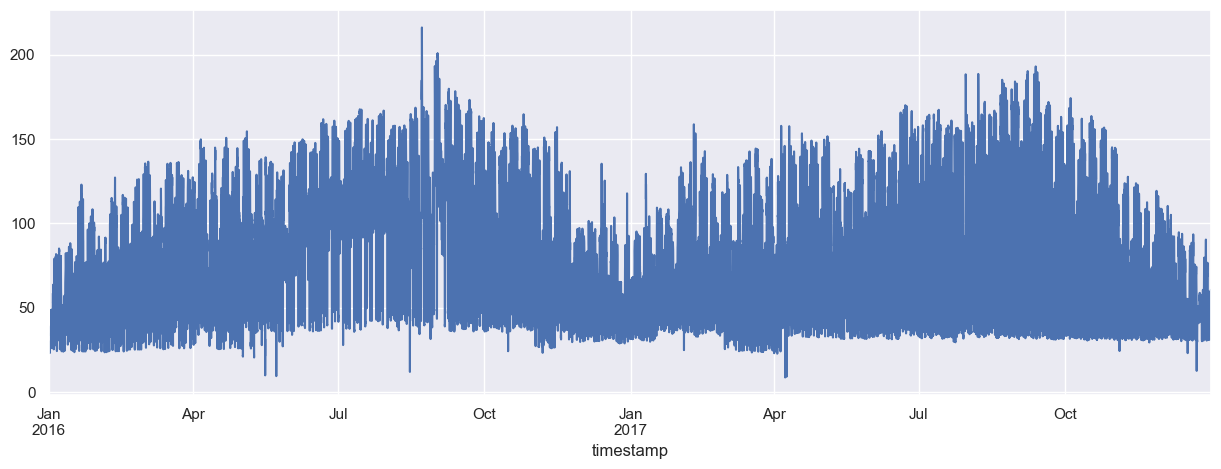

In [15]:
single_meter['kWh'].plot(figsize=(15,5))

In [16]:
single_meter.describe()

,kWh,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,seaLvlPressure,windDirection,windSpeed
count,17542.000000,17542.000000,12573.000000,17542.000000,17472.000000,17490.000000,16328.000000,17531.000000
mean,87.698482,25.075584,2.044460,3.955005,0.139824,1011.413905,153.411318,2.909988
std,38.988008,9.147815,1.927086,7.574827,2.933189,5.194227,103.750868,1.947522
min,8.650000,2.200000,0.000000,-19.400000,-1.000000,996.100000,0.000000,0.000000
25%,51.752500,17.800000,0.000000,-1.700000,0.000000,1007.800000,80.000000,1.500000
50%,88.630000,25.600000,2.000000,3.300000,0.000000,1010.800000,130.000000,2.600000
75%,118.610000,32.200000,4.000000,8.900000,0.000000,1014.600000,250.000000,4.100000
max,216.270000,48.300000,9.000000,24.400000,234.000000,1032.200000,360.000000,15.400000


# Data Preprocessing

In [17]:
# 新增變數: weekday和hour
single_meter['weekday'] = single_meter.index.weekday
single_meter['hour'] = single_meter.index.hour
single_meter = single_meter.dropna()
single_meter

,kWh,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,seaLvlPressure,windDirection,windSpeed,weekday,hour
timestamp,,,,,,,,,,
2016-01-01 00:00:00,28.10,7.2,0.0,-5.6,0.0,1017.3,0.0,0.0,4,0
2016-01-01 01:00:00,26.57,7.2,0.0,-6.7,0.0,1017.0,50.0,1.5,4,1
2016-01-01 02:00:00,25.73,6.1,0.0,-5.0,0.0,1016.9,0.0,0.0,4,2
2016-01-01 03:00:00,25.96,5.0,0.0,-5.6,0.0,1017.4,0.0,0.0,4,3
2016-01-01 04:00:00,25.59,4.4,0.0,-5.6,0.0,1017.2,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...
2017-12-31 04:00:00,31.36,8.3,2.0,-3.3,0.0,1016.1,100.0,3.6,6,4
2017-12-31 05:00:00,41.39,8.9,4.0,-5.0,0.0,1016.0,110.0,3.1,6,5
2017-12-31 06:00:00,50.53,7.8,2.0,-4.4,0.0,1016.3,100.0,1.5,6,6


# correlation analysis

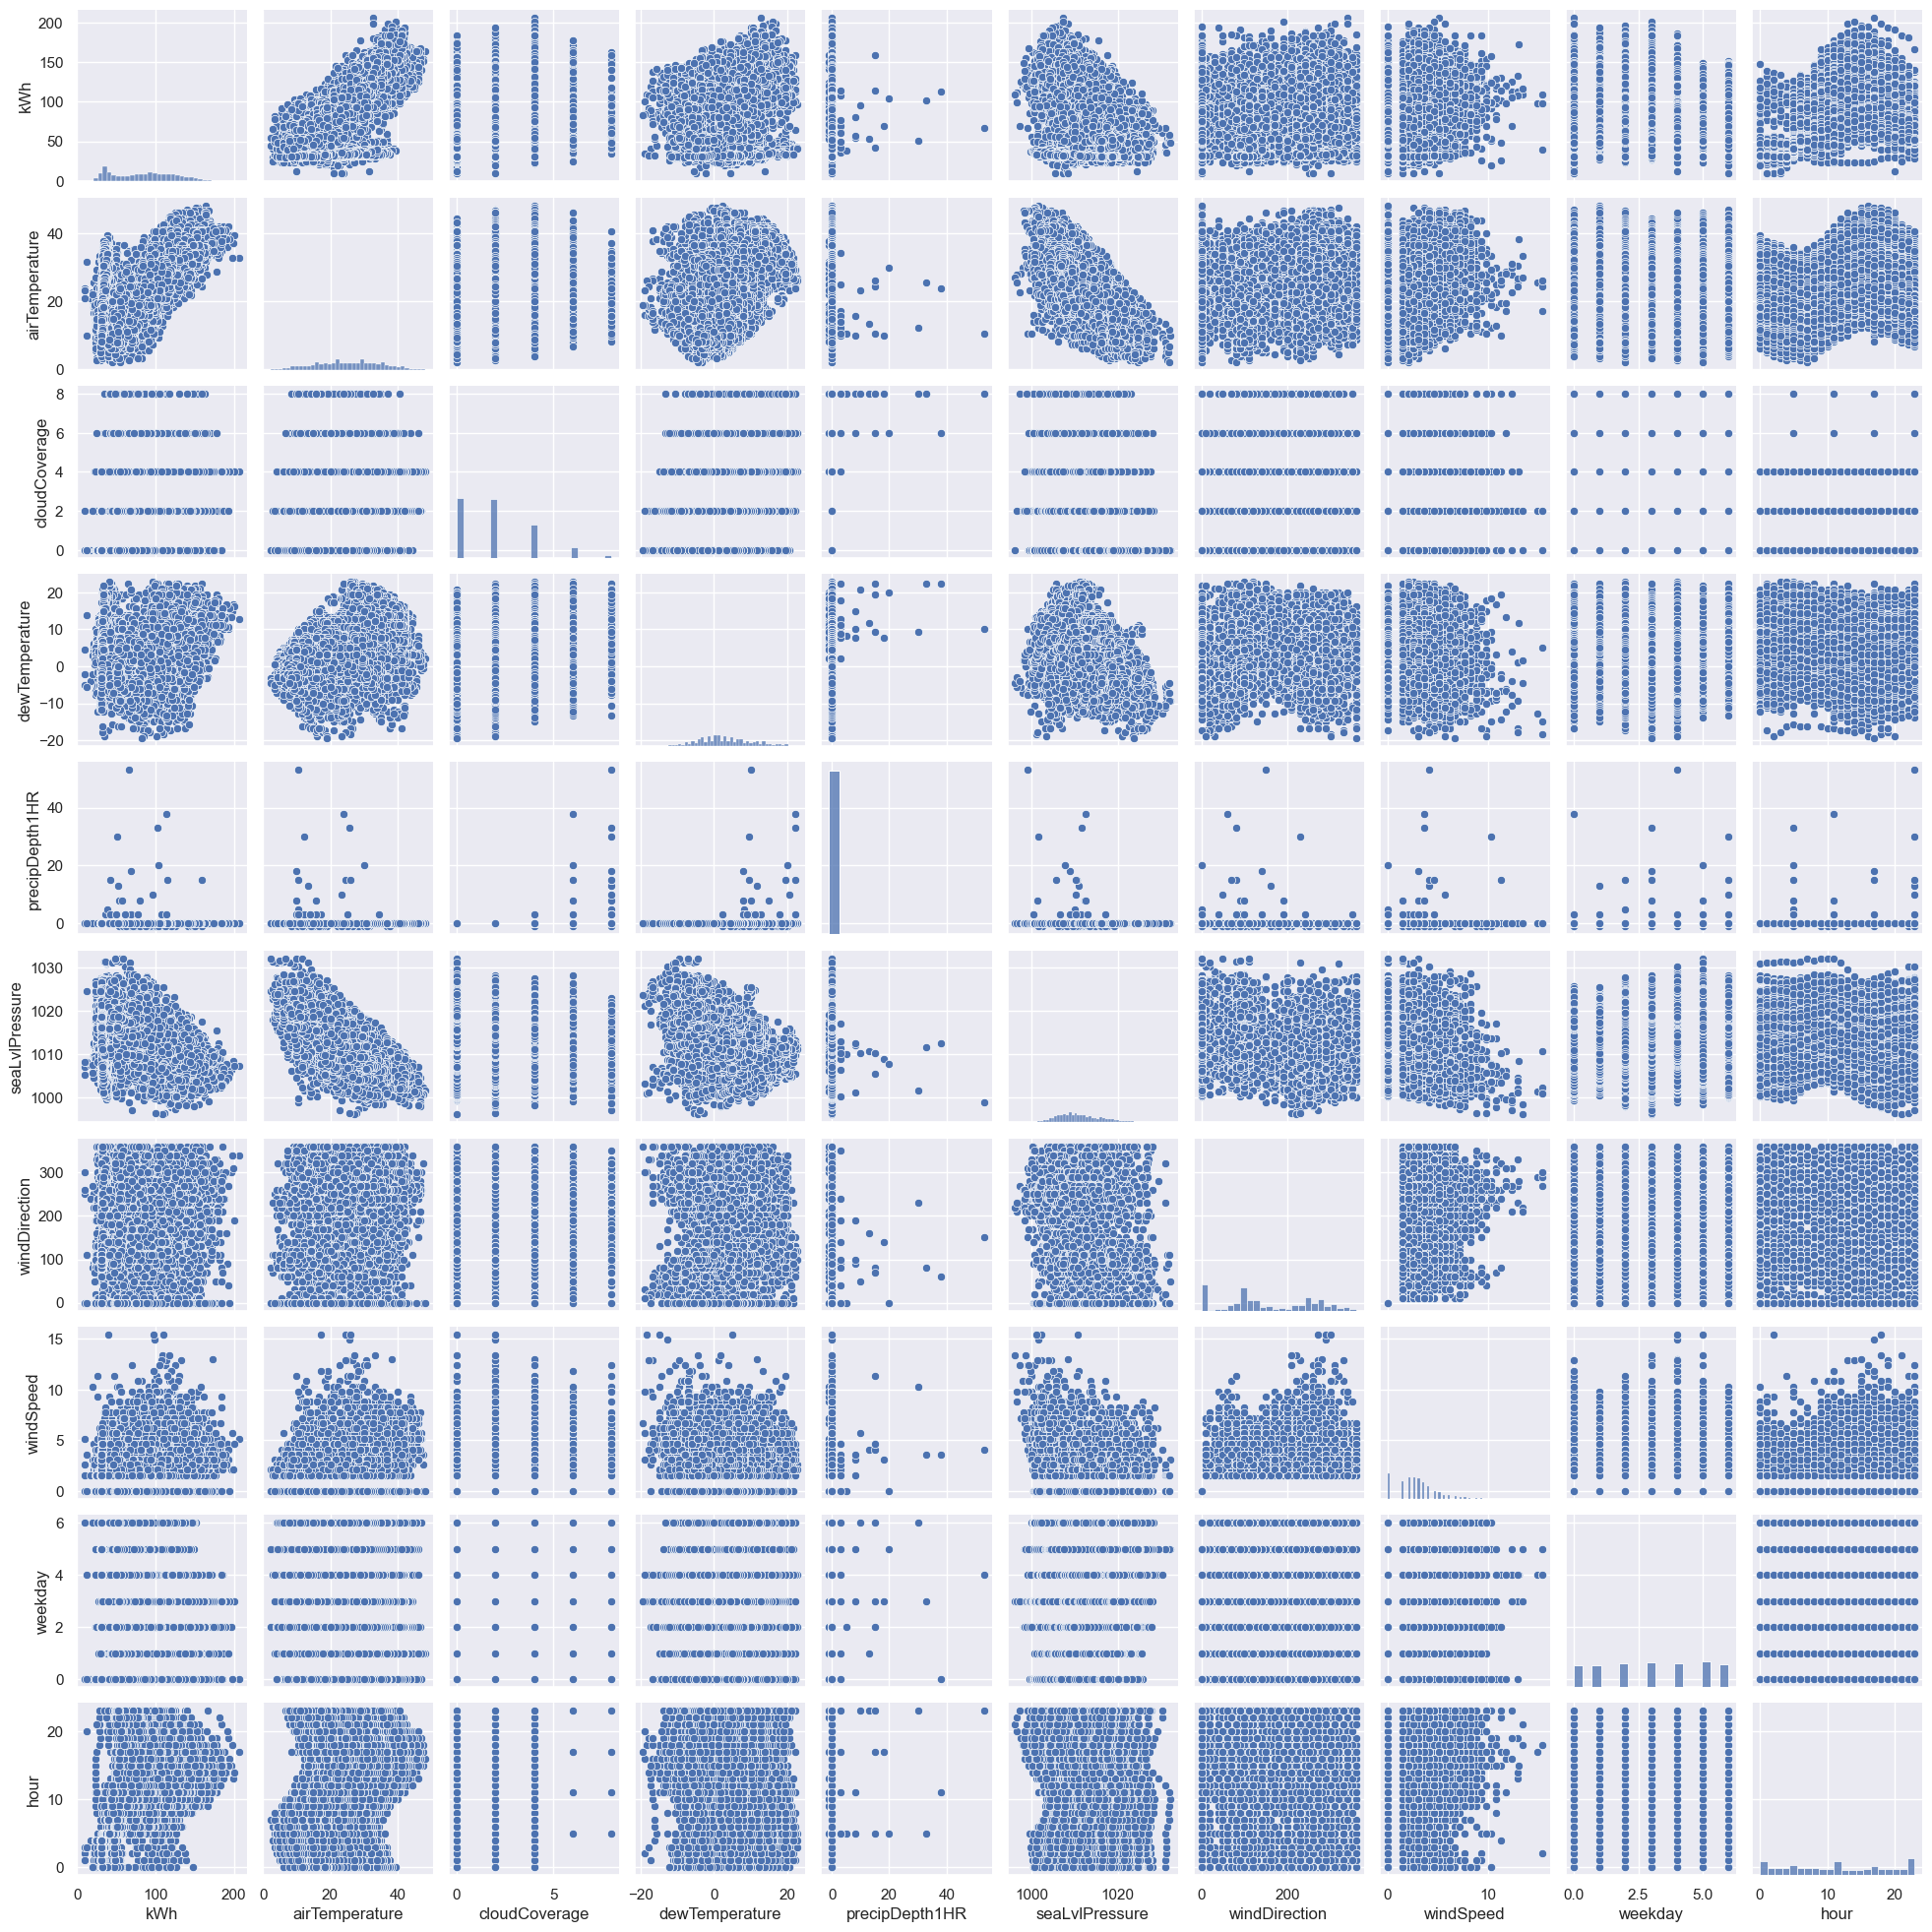

In [18]:
# sns pairplot
sns.pairplot(single_meter, height=2, aspect=1)

<AxesSubplot: >

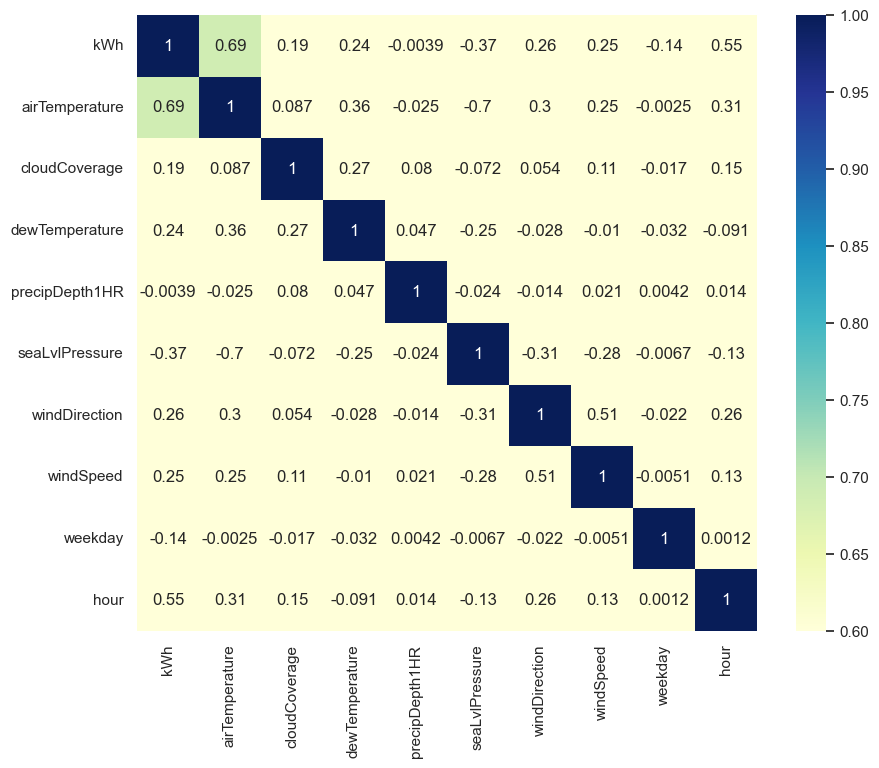

In [19]:
#sns heat map
fig, ax = plt.subplots(figsize=(10,8))   
sns.heatmap(single_meter.corr(), annot=True, cmap="YlGnBu", vmin=0.6, vmax=1.0)

## Data visualization

<AxesSubplot: xlabel='weekday', ylabel='kWh'>

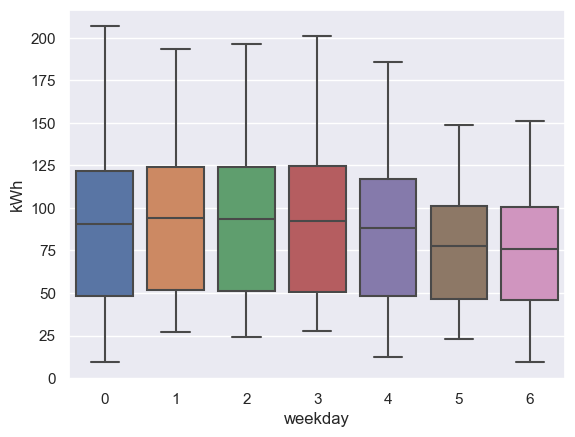

In [20]:
# boxplot (weekday v.s. kWh)
sns.boxplot(data=single_meter, x='weekday', y='kWh')

<AxesSubplot: xlabel='hour', ylabel='kWh'>

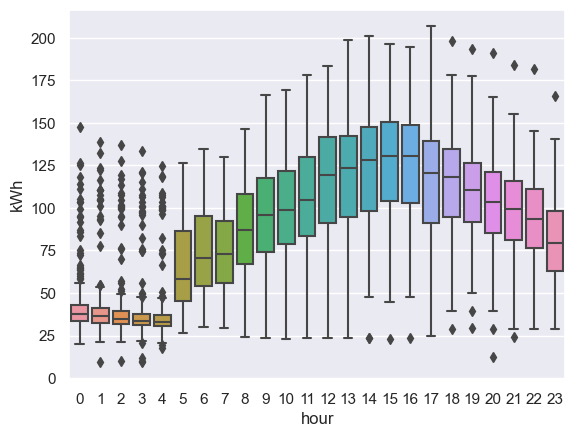

In [21]:
# boxplot (hour v.s. kWh)
sns.boxplot(data=single_meter, x='hour', y='kWh')

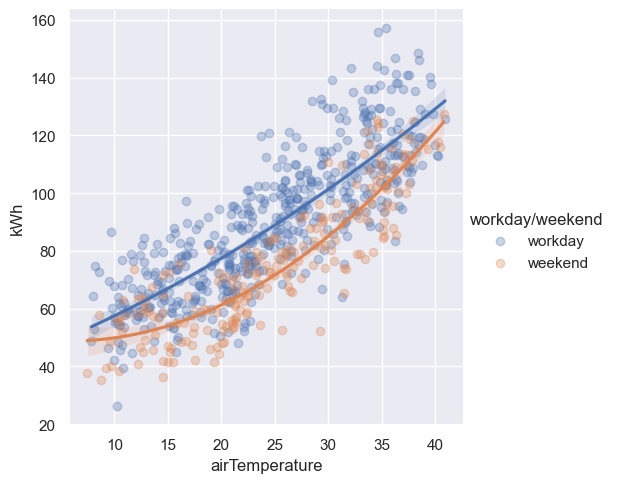

In [22]:
# 能源和外氣溫度的散佈圖
df_plot = single_meter.resample('D').mean().copy()
df_plot['workday/weekend'] = 'workday'
df_plot.loc[df_plot['weekday']>4, 'workday/weekend'] ='weekend'

sns.lmplot(x='airTemperature', y='kWh', hue="workday/weekend",
           data=df_plot, order=2, scatter_kws={'alpha':0.3})

## Modelling experiments


I tested LinearRegression, SVM, RandomForestRegressor and LGBMRegressor to find the optimal model. Among these, LinearRegression runs fastest but doesnt perform very well. LGBMRegressor and RandomForestRegressor perform both well in time consuming and perfomance 

In [ ]:
# 設定輸入和輸出變數
input_var = ['airTemperature', 'dewTemperature', 
             'cloudCoverage', 
            'precipDepth1HR', 
             'seaLvlPressure', 
             'windDirection', 'windSpeed',
            'weekday', 'hour']
target_var = 'kWh'

In [24]:
#切割數據: train_test_split (test_size=0.2)
dataset = single_meter.copy()

X_train,X_test,y_train,y_test = train_test_split(dataset[input_var], dataset[target_var], test_size=0.2)

In [25]:
#切割數據: 2016/2017 (這邊我們不用train_test_split)
dataset = single_meter.copy()

X_train =  dataset.loc['2016', input_var]
X_test =  dataset.loc['2017', input_var]
y_train =  dataset.loc['2016', target_var]
y_test =  dataset.loc['2017', target_var]

model: LinearRegression
r2_score: 0.628
mean_absolute_percentage_error: 0.317
mean_absolute_error: 19.679
CPU times: total: 766 ms
Wall time: 233 ms


<AxesSubplot: xlabel='timestamp'>

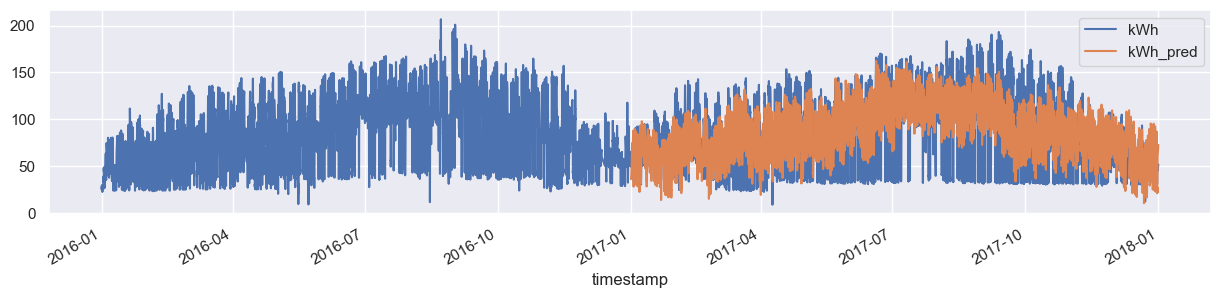

In [26]:
%%time
#建立LinearRegression model
from sklearn.linear_model import LinearRegression

print('model: LinearRegression')
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'kWh_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))

dataset[['kWh','kWh_pred']].plot(figsize=(15,3))

model: svm.SVR
r2_score: 0.101
mean_absolute_percentage_error: 0.532
mean_absolute_error: 31.328
CPU times: total: 5.33 s
Wall time: 5.33 s


<AxesSubplot: xlabel='timestamp'>

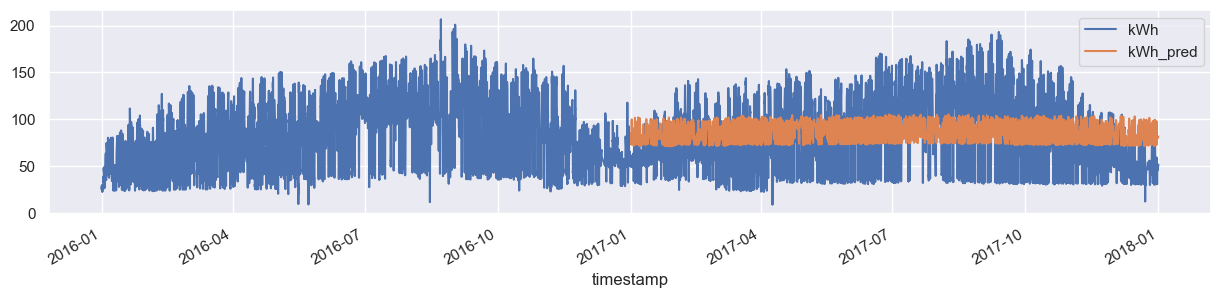

In [27]:
%%time
#建立svm model
from sklearn import svm

print('model: svm.SVR')
model = svm.SVR()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'kWh_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))

dataset[['kWh','kWh_pred']].plot(figsize=(15,3))

model: RandomForestRegressor
r2_score: 0.86
mean_absolute_percentage_error: 0.168
mean_absolute_error: 11.069
CPU times: total: 1.91 s
Wall time: 2.09 s


<AxesSubplot: xlabel='timestamp'>

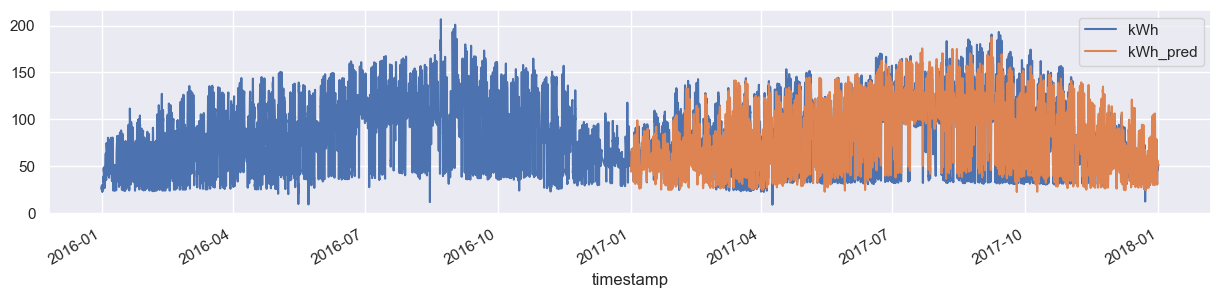

In [28]:
%%time
#建立RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

print('model: RandomForestRegressor')
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'kWh_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))

dataset[['kWh','kWh_pred']].plot(figsize=(15,3))

model: LGBMRegressor
r2_score: 0.867
mean_absolute_percentage_error: 0.164
mean_absolute_error: 10.808
CPU times: total: 2.81 s
Wall time: 204 ms


<AxesSubplot: xlabel='timestamp'>

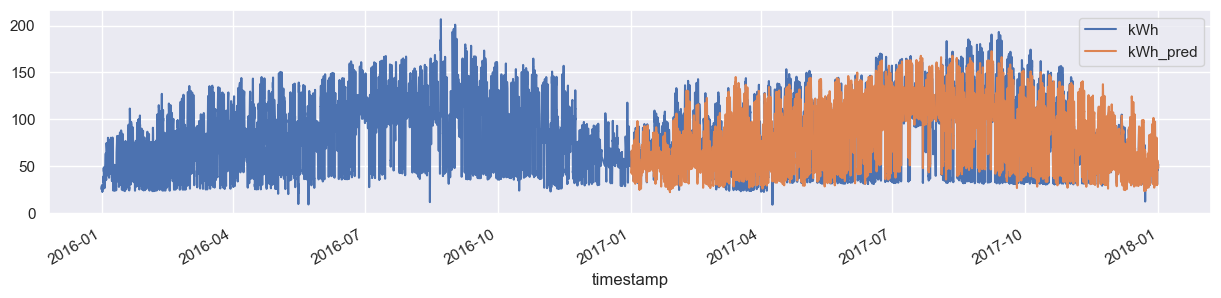

In [29]:
%%time
#建立LGBMRegressor model
from lightgbm import LGBMRegressor

print('model: LGBMRegressor')
model = LGBMRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'kWh_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))

dataset[['kWh','kWh_pred']].plot(figsize=(15,3))